<a href="https://colab.research.google.com/github/Yaqoob-hassan/kmeans-clustering-model/blob/main/MLKMeans4(Cancer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
df = pd.DataFrame(breast_cancer.data , columns = breast_cancer.feature_names)
#print(df)


In [7]:
#df.isnull().sum()

In [30]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
#print(scaled_data)

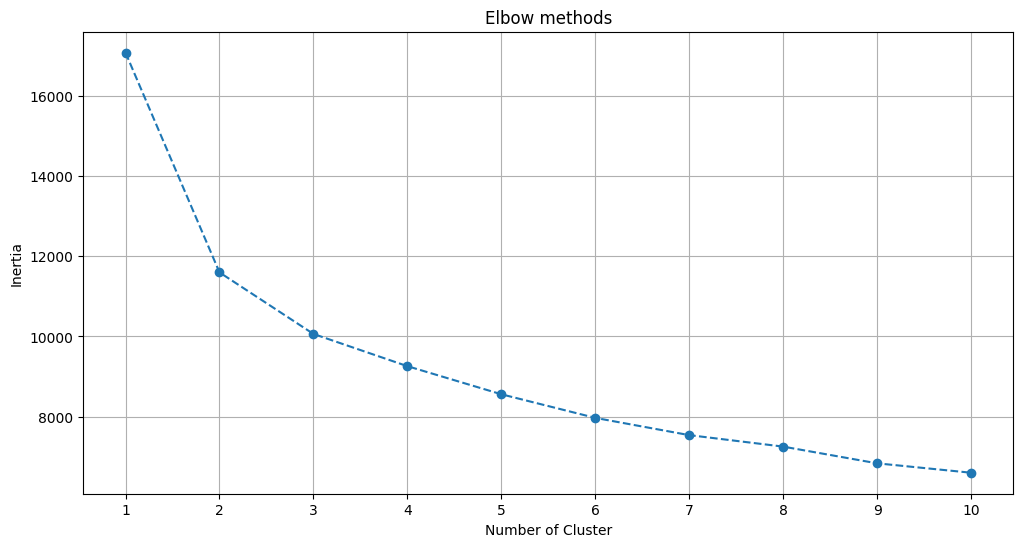

In [31]:
inertia = []
k_means = range(1 ,11)
for k in k_means:
  kmeans = KMeans(n_clusters = k ,random_state = 42 , n_init = 10)
  kmeans.fit(scaled_data)
  inertia.append(kmeans.inertia_)
plt.figure(figsize = (12 ,6))
plt.plot(k_means , inertia , marker = 'o', linestyle = '--')
plt.title("Elbow methods")
plt.xlabel("Number of Cluster")
plt.ylabel("Inertia")
plt.grid(True)
plt.xticks(k_means)
plt.show()


In [32]:
optimal_k = 3
kmeans = KMeans(n_clusters= optimal_k ,random_state = 42 ,n_init = 10)
clusters = kmeans.fit_predict(scaled_data)
df['cluster'] = clusters


           PC1        PC2  cluster
0     9.192837   1.948583        0
1     2.387802  -3.768172        0
2     5.733896  -1.075174        0
3     7.122953  10.275589        2
4     3.935302  -1.948072        0
..         ...        ...      ...
564   6.439315  -3.576817        0
565   3.793382  -3.584048        0
566   1.256179  -1.902297        1
567  10.374794   1.672010        0
568  -5.475243  -0.670637        1

[569 rows x 3 columns]


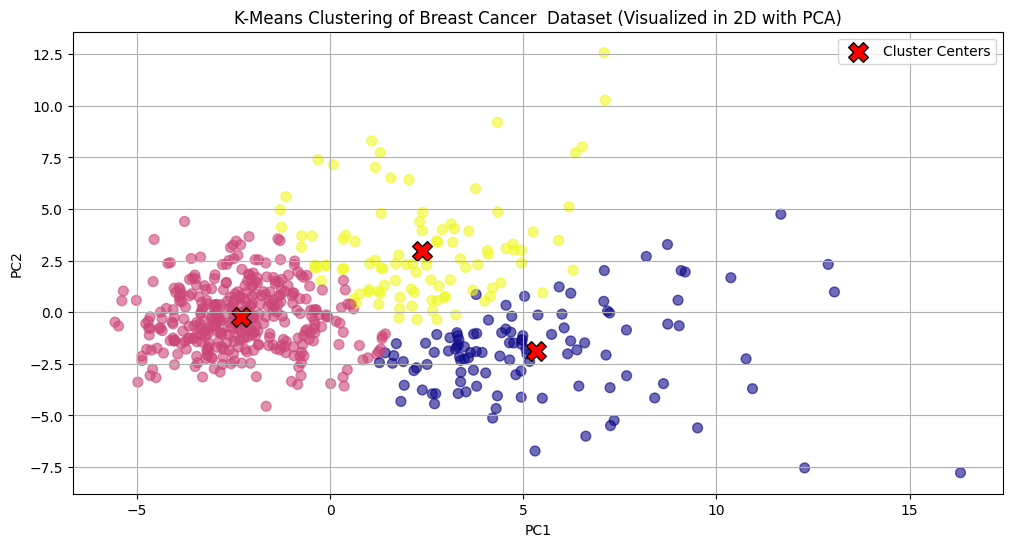

In [41]:
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_result , columns = ['PC1' ,'PC2'])

pca_df['cluster'] = clusters
print(pca_df)

plt.figure(figsize = (12 ,6))
scatter = plt.scatter(pca_df['PC1'], pca_df["PC2"], cmap = 'plasma' ,s = 50 , alpha = 0.6 , c= pca_df['cluster'])
plt.title("K-Means Clustering of Breast Cancer  Dataset (Visualized in 2D with PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', s=200, label='Cluster Centers', edgecolor='black')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
df['Cluster'] = clusters

cluster_profile = df.groupby('Cluster').mean()
print(cluster_profile)

         mean radius  mean texture  mean perimeter    mean area  \
Cluster                                                           
0          19.828000     21.982364      131.395909  1239.661818   
1          12.549571     18.250334       80.569666   497.259053   
2          13.520530     20.058800       89.523200   577.531000   

         mean smoothness  mean compactness  mean concavity  \
Cluster                                                      
0               0.101961          0.153446        0.187512   
1               0.091320          0.074076        0.041225   
2               0.108293          0.158977        0.151006   

         mean concave points  mean symmetry  mean fractal dimension  ...  \
Cluster                                                              ...   
0                   0.106567       0.192999                0.060774  ...   
1                   0.025862       0.171791                0.061091  ...   
2                   0.068281       0.201781      

In [43]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

print("\nNumber of data points in each cluster:")
print(df['Cluster'].value_counts().sort_index())

         mean radius  mean texture  mean perimeter    mean area  \
Cluster                                                           
0          19.828000     21.982364      131.395909  1239.661818   
1          12.549571     18.250334       80.569666   497.259053   
2          13.520530     20.058800       89.523200   577.531000   

         mean smoothness  mean compactness  mean concavity  \
Cluster                                                      
0               0.101961          0.153446        0.187512   
1               0.091320          0.074076        0.041225   
2               0.108293          0.158977        0.151006   

         mean concave points  mean symmetry  mean fractal dimension  ...  \
Cluster                                                              ...   
0                   0.106567       0.192999                0.060774  ...   
1                   0.025862       0.171791                0.061091  ...   
2                   0.068281       0.201781      